### Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/CNN/projects/Electric car and Electric Bus/dataset/Training_set/Training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1486 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/CNN/projects/Electric car and Electric Bus/dataset/test/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 382 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'electric bus': 0, 'electric car': 1}

## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [15]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

### Training the CNN on the Training set and evaluating it on the Test set

In [17]:
fitted_model = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
47/47 [==============================] - 360s 8s/step - loss: 0.5720 - accuracy: 0.6925 - val_loss: 0.4720 - val_accuracy: 0.7539
Epoch 2/25
47/47 [==============================] - 16s 332ms/step - loss: 0.4189 - accuracy: 0.8217 - val_loss: 0.4240 - val_accuracy: 0.8063
Epoch 3/25
47/47 [==============================] - 16s 334ms/step - loss: 0.3864 - accuracy: 0.8385 - val_loss: 0.3264 - val_accuracy: 0.8508
Epoch 4/25
47/47 [==============================] - 16s 334ms/step - loss: 0.3268 - accuracy: 0.8573 - val_loss: 0.2966 - val_accuracy: 0.8743
Epoch 5/25
47/47 [==============================] - 16s 331ms/step - loss: 0.2916 - accuracy: 0.8789 - val_loss: 0.2969 - val_accuracy: 0.8743
Epoch 6/25
47/47 [==============================] - 16s 330ms/step - loss: 0.2648 - accuracy: 0.8991 - val_loss: 0.3672 - val_accuracy: 0.8508
Epoch 7/25
47/47 [==============================] - 16s 331ms/step - loss: 0.2621 - accuracy: 0.8977 - val_loss: 0.2495 - val_accuracy: 0.8979
E

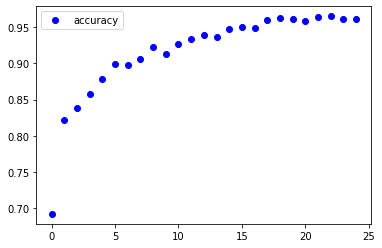

In [18]:
import matplotlib.pyplot as plt
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')

plt.legend()

## Part 4 - Making a single prediction

In [29]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/gdrive/MyDrive/Colab Notebooks/CNN/projects/Electric car and Electric Bus/dataset/testing/t6.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Electric Car'
else:
  prediction = 'Electric Bus'

In [30]:
print(prediction)

Electric Car
